In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


In [3]:
import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import cv2


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [5]:
data_dir = '/kaggle/input/gtsrb-german-traffic-sign/train'  # Update this path according to your dataset location


In [6]:
if not os.path.exists(data_dir):
    print(f"Error: Directory {data_dir} does not exist. Please check the dataset path.")
else:
    # Extracting class labels from the dataset
    categories = sorted(os.listdir(data_dir))
    print(f"Number of classes: {len(categories)}")
    print(f"Class labels: {categories}")

Number of classes: 43
Class labels: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [7]:
categories = sorted(os.listdir(data_dir))
print(f"Number of classes: {len(categories)}")
print(f"Class labels: {categories}")

# Load images and labels from the GTSRB dataset
images = []
labels = []

for category in categories:
    category_path = os.path.join(data_dir, category)
    label = int(category)  # Convert folder name to class integer
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))  # Resize to 32x32 pixels
        images.append(img)
        labels.append(label)

Number of classes: 43
Class labels: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [8]:
images = np.array(images)
labels = np.array(labels)

# Shuffle the dataset to avoid any order bias
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# Normalize the images (scaling pixel values to range [0, 1])
images = images / 255.0

Training data shape: (31367, 32, 32, 3)
Validation data shape: (7842, 32, 32, 3)


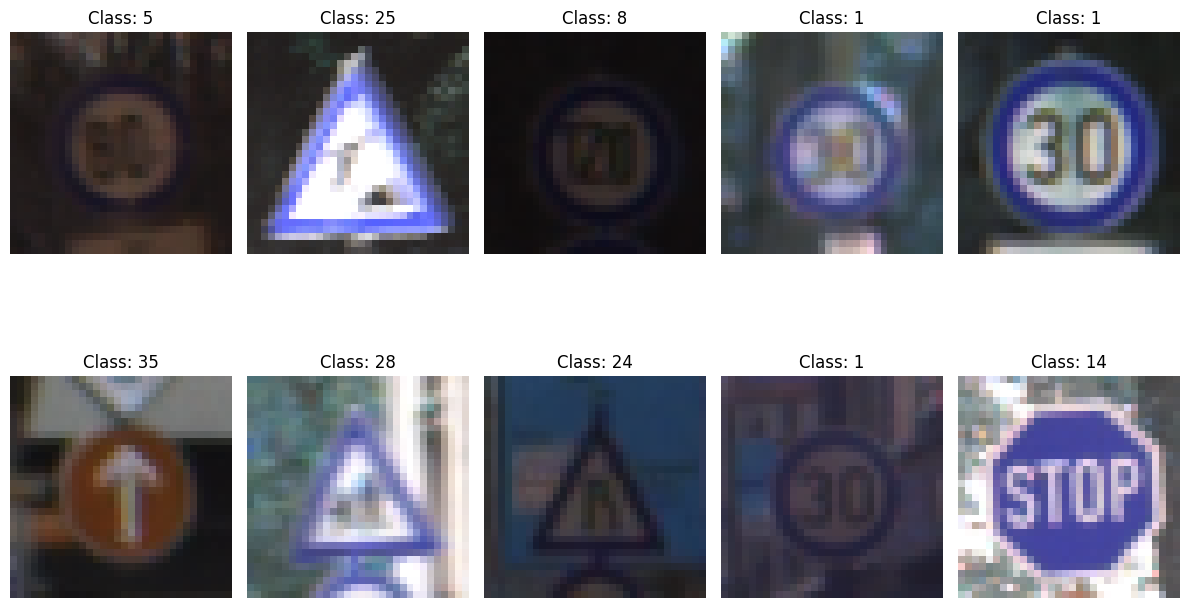

In [9]:
# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Plotting sample images with labels
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Class: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)
datagen.fit(X_train)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer with number of classes
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.2299 - loss: 2.7336 - val_accuracy: 0.7071 - val_loss: 0.9955
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.6367 - loss: 1.1081 - val_accuracy: 0.8832 - val_loss: 0.3659
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8057 - loss: 0.6054 - val_accuracy: 0.9319 - val_loss: 0.1990
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8766 - loss: 0.3763 - val_accuracy: 0.9731 - val_loss: 0.0974
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9121 - loss: 0.2813 - val_accuracy: 0.9818 - val_loss: 0.0703
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9324 - loss: 0.2169 - val_accuracy: 0.9861 - val_loss: 0.0578
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9435 - loss: 0.1803 - val_accuracy: 0.9889 - val_loss: 0.0396
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.9471 - loss: 0.1723 - 

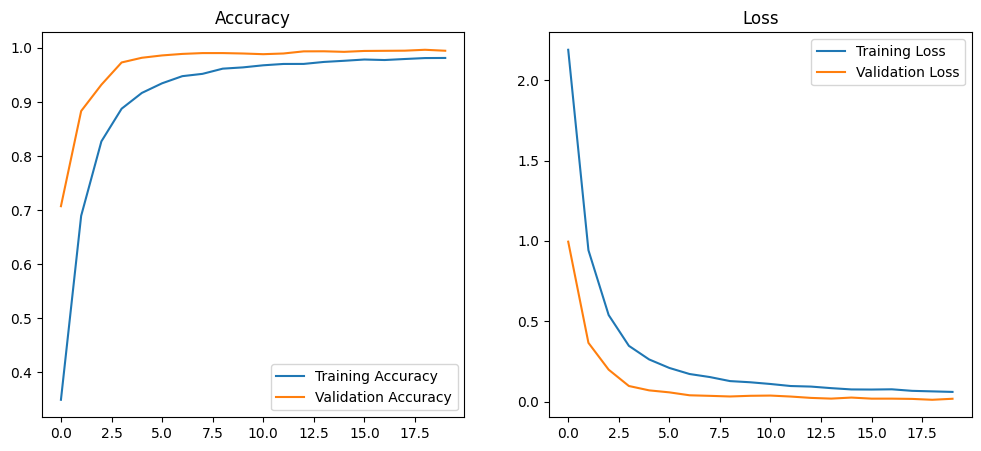

In [12]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val)
)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9960 - loss: 0.0151
Validation Accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


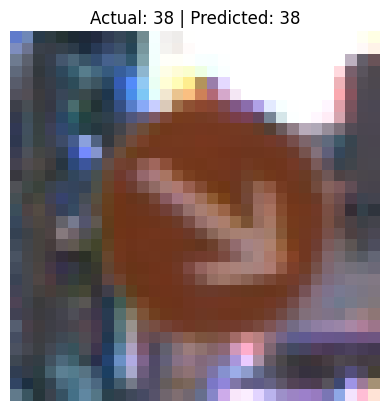

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


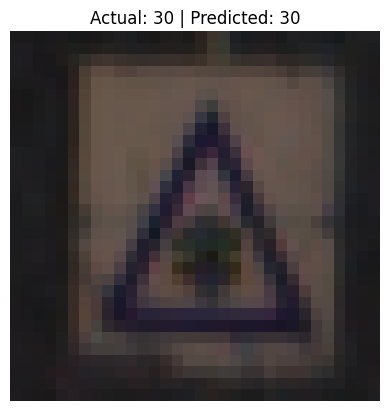

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


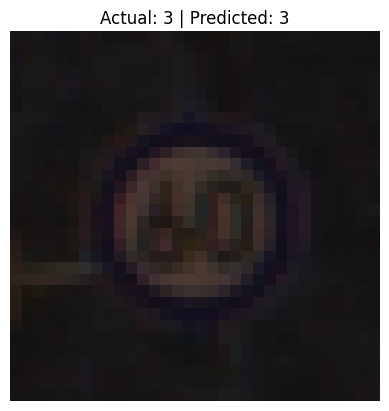

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


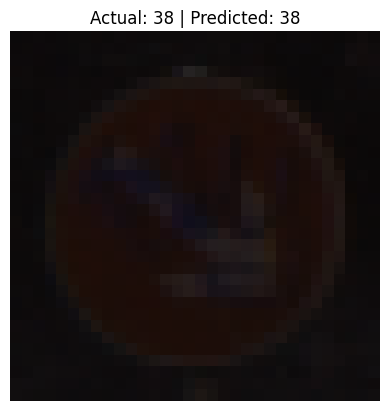

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


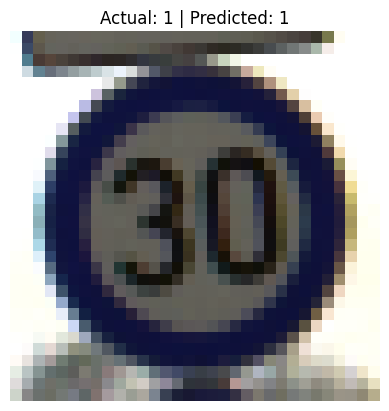

In [13]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.2f}")

# Save the trained model
model.save('gtsrb_traffic_sign_classifier.h5')

# Test the model on a few validation images
for i in range(5):
    img = X_val[i]
    plt.imshow(img)
    plt.title(f"Actual: {np.argmax(y_val[i])} | Predicted: {np.argmax(model.predict(img.reshape(1, 32, 32, 3)))}")
    plt.axis('off')
    plt.show()